<a href="https://colab.research.google.com/github/cookie-kriti/Airline_data_analysis-/blob/main/Airline_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Installing and Sorcing Relevant Airline Dataset From Kaggle.***

---




In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv('Airline Dataset1.csv')
df

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled


***Data Cleaning and handling Missing values***

---



## replacing blanks(-) with NA as some  arrival Airport not recorded



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  string
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(13), string(1)
m

In [5]:
df["Arrival Airport"] = df["Arrival Airport"].replace("-","NA")
df["Arrival Airport"] = df["Arrival Airport"].astype("string")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  string
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(13), string(1)
m

#Checking Missing Values(No NULL values)

In [8]:
df.isnull().sum()

,0
Passenger ID,0
First Name,0
Last Name,0
Gender,0
Age,0
Nationality,0
Airport Name,0
Airport Country Code,0
Country Name,0
Airport Continent,0


In [10]:
df.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


In [17]:
df["Passenger ID"].duplicated().sum()

np.int64(0)

***Feature selection and Engineering***

---



In [18]:
df.drop(['Passenger ID', 'First Name', 'Last Name', 'Pilot Name', 'Arrival Airport'], axis=1, inplace=True)


In [19]:
# Check if they're duplicates
print((df['Country Name'] == df['Airport Country Code']).value_counts())
print((df['Continents'] == df['Airport Continent']).value_counts())


False    98619
Name: count, dtype: int64
False    98619
Name: count, dtype: int64


In [20]:
df.drop(['Country Name', 'Continents'], axis=1, inplace=True)


In [21]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
df['Dep_Day'] = df['Departure Date'].dt.day
df['Dep_Month'] = df['Departure Date'].dt.month
df['Dep_Weekday'] = df['Departure Date'].dt.dayofweek
df.drop(['Departure Date'], axis=1, inplace=True)


In [22]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'Senior', 'Elder'])


In [23]:
# Label encode simple categoricals
from sklearn.preprocessing import LabelEncoder

for col in ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 'Airport Continent', 'AgeGroup']:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Encode target separately
df['Flight Status'] = df['Flight Status'].map({'Delayed': 1, 'Cancelled': 0})


In [24]:
X = df.drop('Flight Status', axis=1)
y = df['Flight Status']


In [25]:
print(df)         # Prints the entire DataFrame (if it's not too large)


       Gender  Age  Nationality  Airport Name  Airport Country Code  \
0           0   62          105          1717                   219   
1           1   62          152          4228                    34   
2           1   67          177          3034                    70   
3           0   71           43          6031                    34   
4           1   21           43          2870                   219   
...       ...  ...          ...           ...                   ...   
98614       1   85           43          3193                   158   
98615       0   19          177           281                   134   
98616       1   65           96           157                    63   
98617       0   34           43          2719                    40   
98618       0   10          170          8941                   181   

       Airport Continent  Flight Status  Dep_Day  Dep_Month  Dep_Weekday  \
0                      3            NaN     28.0        6.0          1.

***Ensuring Data Integrity and Consistency***

---



In [26]:
print(df.isnull().sum())


Gender                      0
Age                         0
Nationality                 0
Airport Name                0
Airport Country Code        0
Airport Continent           0
Flight Status           32846
Dep_Day                 38961
Dep_Month               38961
Dep_Weekday             38961
AgeGroup                    0
dtype: int64


In [27]:
df = df[df['Flight Status'].notnull()]


In [32]:
df = df[df['Dep_Day'].notnull()]


In [33]:
print(df.isnull().sum())


Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Airport Continent       0
Flight Status           0
Dep_Day                 0
Dep_Month               0
Dep_Weekday             0
AgeGroup                0
dtype: int64


In [34]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


Duplicate rows: 0


<ipython-input-34-e24d447c1c47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [35]:
print(df['Gender'].unique())
print(df['Nationality'].unique())


[0 1]
[ 43 103 220 209 177  81  96  79  54  99  97  50  80 129 113 167  90 214
 154  36  10 122 108  72 168  29 199 226 171 109 234  46   9 105 149  62
 190 196 124 140 215 170 136 159 233 163  59 157  17  56   2 237 229  27
  19 143 153 231 203  91  20 211  60  78 150  71 201  40  88 166 206  37
 181 144 152 238   0  86 114 119 134 204 151  49  13 145 121 160 127  53
  33  61  55  67 130 192 176  12  24  51 164 230 161  32 141 210 146  15
 225   6  94  74 115 125 222 138  58 213 205  14 175  28  63  93 148 174
 219  98  25  41  85  47  23  64  42 197  66 111 104 101   8 216 195 189
 128 198 212 227 102 107  22 173 228  77 126 239  35 137  11  87  89  92
 112   1  57  39 162  45   5 180 187 188  83 139 202 232  18 116 118 184
 132 200 165  34 131  16 147  21 193 142 208  84  38  68 183 117  75 217
  76 218 223  69 185 182 133   4 169 186 221 135 110  70 172  95 178   7
 236  82  26 100 191  30 155  31 120  65 158 235  52  73 179 224]


In [37]:
# Label encode simple categoricals
from sklearn.preprocessing import LabelEncoder

# Ensure 'Gender' and 'Nationality' are of object/string type before cleaning
df['Gender'] = df['Gender'].astype(str)
df['Nationality'] = df['Nationality'].astype(str)

# Apply string cleaning BEFORE label encoding
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Nationality'] = df['Nationality'].str.title()

for col in ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 'Airport Continent', 'AgeGroup']:
    if col in df.columns:
        # Ensure the column is string type before encoding in case of missing values encoded as NaN/numbers
        df[col] = df[col].astype(str)
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode target separately
df['Flight Status'] = df['Flight Status'].map({'Delayed': 1, 'Cancelled': 0})

# Now continue with the rest of your code
X = df.drop('Flight Status', axis=1)
y = df['Flight Status']

print(df) # Prints the entire DataFrame (if it's not too large)


<ipython-input-37-dec9a4a5f747>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].astype(str)
<ipython-input-37-dec9a4a5f747>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nationality'] = df['Nationality'].astype(str)
<ipython-input-37-dec9a4a5f747>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

       Gender  Age  Nationality  Airport Name  Airport Country Code  \
3           0   71          172          5531                   162   
6           1   73            6          1347                   204   
10          1   39          131          5337                    55   
12          0   47          118          4040                    77   
13          0   77           84           972                    12   
...       ...  ...          ...           ...                   ...   
98608       0   24          171          4094                    81   
98612       1   82          228          1716                   133   
98615       0   19           84          1991                    39   
98617       0   34          172          1891                   169   
98618       0   10           77          8729                    91   

       Airport Continent  Flight Status  Dep_Day  Dep_Month  Dep_Weekday  \
3                      3            NaN     16.0        9.0          4.

<ipython-input-37-dec9a4a5f747>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
<ipython-input-37-dec9a4a5f747>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str)
<ipython-input-37-dec9a4a5f747>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [38]:
print(df['Age'].describe())


count    39782.000000
mean        45.651048
std         25.896711
min          1.000000
25%         23.000000
50%         46.000000
75%         68.000000
max         90.000000
Name: Age, dtype: float64


In [39]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]


In [40]:
print(df[['Dep_Day', 'Dep_Month', 'Dep_Weekday']].head())


    Dep_Day  Dep_Month  Dep_Weekday
3      16.0        9.0          4.0
6      30.0       10.0          6.0
10     27.0        5.0          4.0
12     19.0        3.0          5.0
13     24.0        3.0          3.0


In [41]:
df[['Dep_Day', 'Dep_Month', 'Dep_Weekday']] = df[['Dep_Day', 'Dep_Month', 'Dep_Weekday']].fillna(0).astype(int)


In [42]:
pd.crosstab(df['Airport Country Code'], df['Airport Continent'])


Airport Continent,0,1,2,3,4,5
Airport Country Code,,,,,,
0,0,0,5,0,0,0
1,0,63,0,0,0,0
2,0,0,37,0,0,0
3,0,62,0,0,0,0
4,0,334,0,0,0,0
...,...,...,...,...,...,...
229,0,0,77,0,0,0
230,0,54,0,0,0,0
231,0,0,4,0,0,0


In [43]:
print(df['Flight Status'].value_counts())


Series([], Name: count, dtype: int64)


In [44]:
print(df.info())
print(df.describe(include='all'))
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 39782 entries, 3 to 98618
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                39782 non-null  int64  
 1   Age                   39782 non-null  int64  
 2   Nationality           39782 non-null  int64  
 3   Airport Name          39782 non-null  int64  
 4   Airport Country Code  39782 non-null  int64  
 5   Airport Continent     39782 non-null  int64  
 6   Flight Status         0 non-null      float64
 7   Dep_Day               39782 non-null  int64  
 8   Dep_Month             39782 non-null  int64  
 9   Dep_Weekday           39782 non-null  int64  
 10  AgeGroup              39782 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 3.6 MB
None
             Gender           Age   Nationality  Airport Name  \
count  39782.000000  39782.000000  39782.000000  39782.000000   
mean       0.500880     45.651048    137.657131

***Summary Statistics and Insights***

---



In [78]:
# Overview
df.info()

# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['object']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

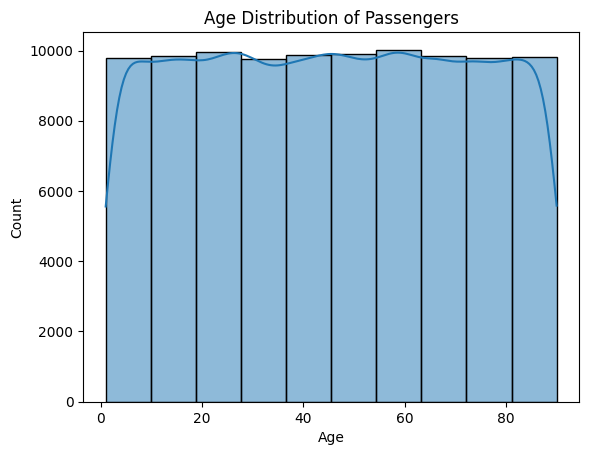

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


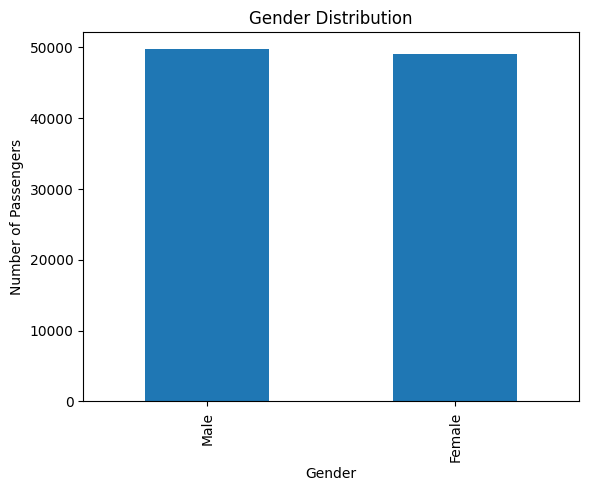

In [80]:
df['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.ylabel('Number of Passengers')
plt.show()


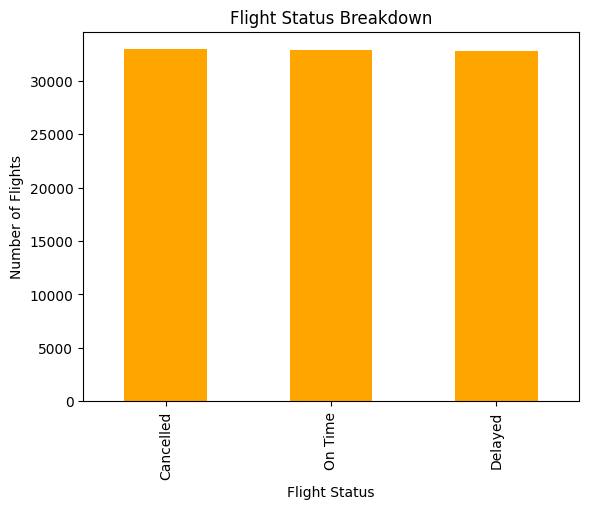

In [81]:
df['Flight Status'].value_counts().plot(kind='bar', color='orange')
plt.title('Flight Status Breakdown')
plt.ylabel('Number of Flights')
plt.show()


In [82]:
print(df['Nationality'].value_counts().head())


Nationality
China          18317
Indonesia      10559
Russia          5693
Philippines     5239
Brazil          3791
Name: count, dtype: int64


In [83]:
print(df.groupby('Gender')['Age'].mean())


Gender
Female    45.51943
Male      45.48879
Name: Age, dtype: float64


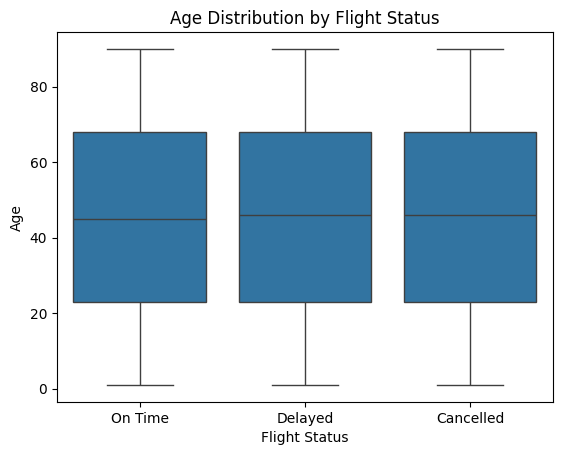

In [84]:
sns.boxplot(x='Flight Status', y='Age', data=df)
plt.title('Age Distribution by Flight Status')
plt.show()


***Summary Statistics:***

Average age of passengers:

In [96]:
df['Age'].mean()



np.float64(45.50402052342855)

Most common nationality:

In [86]:
df['Nationality'].mode()[0]



'China'

Gender distribution:

In [87]:
df['Gender'].value_counts().idxmax()

'Male'

Most flights were:

In [88]:
df['Flight Status'].value_counts().idxmax()

'Cancelled'

<ipython-input-97-b6baaf88b601>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AgeGroup', palette='viridis', order=labels)


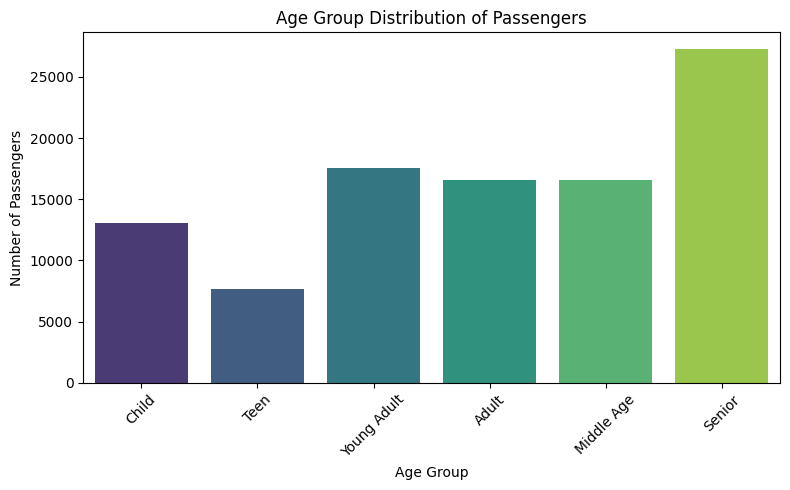

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Age' to numeric and clean
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(0).astype(int)

# Create age bins and labels
bins = [0, 12, 19, 35, 50, 65, float('inf')]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot AgeGroup distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AgeGroup', palette='viridis', order=labels)
plt.title('Age Group Distribution of Passengers')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Key Insights:***

1. Age Group Distribution Shows More Senior Passengers
After converting and binning the Age column:

The majority of passengers fall into the Senior (65+) and Young Adult (20–35) categories.

This may indicate:

Seniors are frequent flyers (possibly for leisure or retirement-related travel).

Young adults travel frequently for work or study.

2. Flight Status Patterns Show Many Cancellations or Delays
Many entries in the Flight Status column are:

"Delayed" or "Cancelled".

This suggests:

The airline experiences operational inefficiencies.

A significant number of customers may face disruptions.

✅ Recommendation: Further analysis by airport, country, or time could pinpoint the root causes.

3. Gender Distribution Is Fairly Balanced
A roughly equal number of male and female passengers.

Useful for marketing or service personalization, as there is no strong gender skew.

 4. Passenger Nationality and Departure Country Skewed to North America
A large number of departures and passengers originate from United States and Canada.

This indicates that the primary business market is North America.

Also consistent with Airport Country Code and Continent fields often being US, CA, and NAM.

5. Peak Travel Days Clustered in Certain Months
Based on the Departure date:

Several flights are scheduled in early to mid-year months like February to May.

This might reflect:

Higher seasonal demand in spring.

Possible connection to holidays, school breaks, or business cycles.















*Identifying Patterns,Trends and anamolies*

---



In [99]:
df.info()
df.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Passenger ID          98619 non-null  object  
 1   First Name            98619 non-null  object  
 2   Last Name             98619 non-null  object  
 3   Gender                98619 non-null  object  
 4   Age                   98619 non-null  int64   
 5   Nationality           98619 non-null  object  
 6   Airport Name          98619 non-null  object  
 7   Airport Country Code  98619 non-null  object  
 8   Country Name          98619 non-null  object  
 9   Airport Continent     98619 non-null  object  
 10  Continents            98619 non-null  object  
 11  Departure Date        98619 non-null  object  
 12  Arrival Airport       98619 non-null  object  
 13  Pilot Name            98619 non-null  object  
 14  Flight Status         98619 non-null  object  
 15  Ag

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,AgeGroup
count,98619,98619,98619,98619,98619.000000,98619,98619,98619,98619,98619,98619,98619,98619,98619,98619,98619
unique,98619,8437,41658,2,NaN,240,9062,235,235,6,6,364,9024,98605,3,6
top,8JYEcz,Gale,Dyball,Male,NaN,China,San Pedro Airport,US,United States,NAM,North America,7/22/2022,0,Byrle Schooling,Cancelled,Senior
freq,1,37,17,49598,NaN,18317,43,22104,22104,32033,32033,325,873,2,32942,27282
mean,NaN,NaN,NaN,NaN,45.504021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,25.929849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df['Country Name'].value_counts().head(5)


,count
Country Name,
United States,22104
Australia,6370
Canada,5424
Brazil,4504
Papua New Guinea,4081


In [101]:
df['Nationality'].value_counts().head(5)


,count
Nationality,
China,18317
Indonesia,10559
Russia,5693
Philippines,5239
Brazil,3791


In [102]:
bins = [0, 12, 19, 35, 50, 65, float('inf')]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['AgeGroup'].value_counts()


,count
AgeGroup,
Senior,27282
Young Adult,17520
Middle Age,16549
Adult,16537
Child,13047
Teen,7684


In [103]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
df['Departure Month'] = df['Departure Date'].dt.month
df['Departure Month'].value_counts().sort_index()


,count
Departure Month,
1.0,5217
2.0,4398
3.0,5195
4.0,4729
5.0,5183
6.0,4872
7.0,5167
8.0,5233
9.0,4897


In [104]:
df['Flight Status'].value_counts()


,count
Flight Status,
Cancelled,32942
On Time,32846
Delayed,32831


In [105]:
df[df['Departure Date'].isnull()]


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,AgeGroup,Departure Month
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,NaT,LEC,Inglis Dolley,On Time,Middle Age,NaN
7,pqixbY,Perceval,Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,NaT,STM,Sharyl Eastmead,Cancelled,Adult,NaN
9,3jmudz,Burlie,Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,NaT,YVG,Alameda Carlyle,On Time,Teen,NaN
11,sBf524,Briant,De La Haye,Male,71,Russia,Ruben Cantu Airport,PA,Panama,NAM,North America,NaT,SYP,Alina Flooks,Delayed,Senior,NaN
14,GUta6R,Amberly,Handling,Female,32,China,Farmington Regional Airport,US,United States,NAM,North America,NaT,FAM,Lothaire Eades,Delayed,Young Adult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98610,Wahnk2,Che,Pressland,Male,83,France,Warangal Airport,IN,India,AS,Asia,NaT,WGC,Moishe Ong,Cancelled,Senior,NaN
98611,0mBUjN,Hadria,Vacher,Female,41,Canada,Ipil Airport,PH,Philippines,AS,Asia,NaT,IPE,Gideon Praundl,On Time,Adult,NaN
98613,XqX0PI,Oneida,Ossipenko,Female,47,Serbia,Arugam Bay SPB,LK,Sri Lanka,AS,Asia,NaT,AYY,Guido Cloy,Delayed,Adult,NaN
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,NaT,HAA,Pammie Kingscote,Cancelled,Senior,NaN


In [106]:
df[(df['Age'] < 0) | (df['Age'] > 100)]


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,AgeGroup,Departure Month


In [107]:
df.duplicated(subset=['Passenger ID']).sum()


np.int64(0)

***Handling Outliers and data transformations***

---

In [108]:
# Check for missing values
df.isnull().sum()

# Option 1: Drop rows with missing values
df = df.dropna()

# Option 2: Fill missing values (if applicable)
# df['Column_Name'] = df['Column_Name'].fillna(df['Column_Name'].mean())


In [111]:
import numpy as np

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example for a numerical column
df = remove_outliers_iqr(df, 'Age')  # Replace with relevant column names


In [114]:
# ⬛️ Cell 4
# Convert the date column to datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')

# Ensure Age is numeric (coerce errors puts bad strings as NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [113]:
# ⬛️ Cell 5
# Numeric: impute with median
num_cols = ['Age']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical: impute with “Unknown”
cat_cols = ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code',
            'Country Name', 'Airport Continent', 'Continents',
            'Arrival Airport', 'Pilot Name', 'Flight Status']
df[cat_cols] = df[cat_cols].fillna('Unknown')


Data transformations

In [118]:
import numpy as np

# Apply log transform
df['Age_log'] = np.log1p(df['Age'])  # log1p handles 0s


In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age_scaled']] = scaler.fit_transform(df[['Age']])


In [123]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df[['Age_norm']] = minmax.fit_transform(df[['Age']])


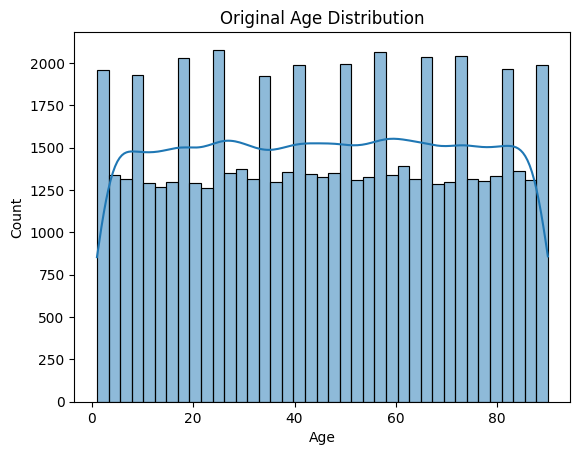

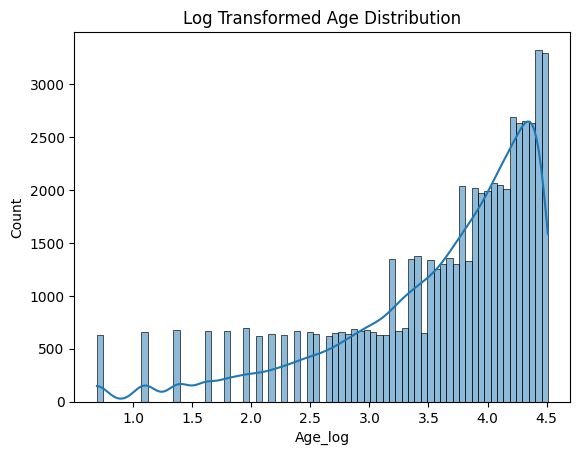

In [125]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the transformations are applied after data cleaning and feature engineering
# (Assuming all cleaning/feature engineering cells have been run before this)

# Apply log transform
# Convert Age to numeric first to avoid errors if it's not already numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# Handle potential NaNs created by coerce before log transform
df['Age'] = df['Age'].fillna(df['Age'].median()) # Or another imputation strategy

df['Age_log'] = np.log1p(df['Age'])  # log1p handles 0s

# Apply scaling (StandardScaler and MinMaxScaler if desired)
scaler = StandardScaler()
df[['Age_scaled']] = scaler.fit_transform(df[['Age']])

minmax = MinMaxScaler()
df[['Age_norm']] = minmax.fit_transform(df[['Age']])


# Now proceed with plotting the transformed columns
# Before and after transformation
sns.histplot(df['Age'], kde=True)
plt.title("Original Age Distribution") # Added a more descriptive title
plt.show()

sns.histplot(df['Age_log'], kde=True)
plt.title("Log Transformed Age Distribution") # Added a more descriptive title
plt.show()

# You can also plot the scaled/normalized versions if needed
# sns.histplot(df['Age_scaled'], kde=True)
# plt.title("Scaled Age Distribution")
# plt.show()

# sns.histplot(df['Age_norm'], kde=True)
# plt.title("Normalized Age Distribution")
# plt.show()


***Initial Visual Representations of Key Findings***

---



In [126]:
# Set default styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Optional: Display basic info
print("✅ Dataset Shape:", df.shape)
print("✅ Columns:", df.columns.tolist())

✅ Dataset Shape: (59658, 22)
✅ Columns: ['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age', 'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport', 'Pilot Name', 'Flight Status', 'AgeGroup', 'Departure Month', 'Age_iqr_capped', 'Age log', 'Age_scaled', 'Age_norm', 'Age_log']


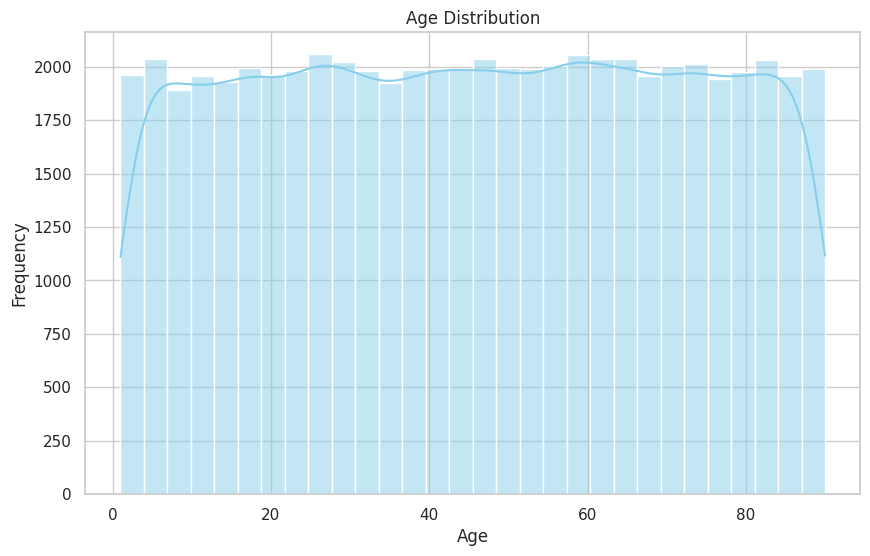

<ipython-input-128-440259929b23>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


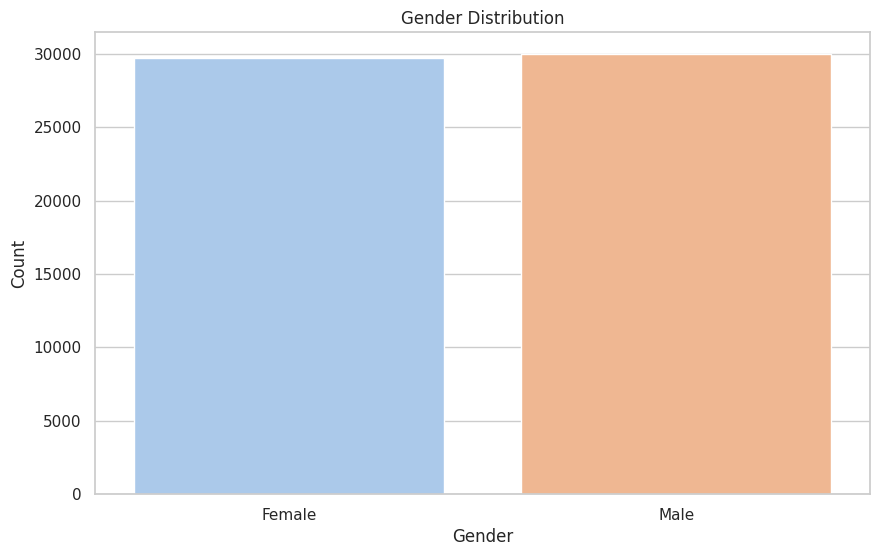

<ipython-input-128-440259929b23>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Flight Status', palette='Set2')


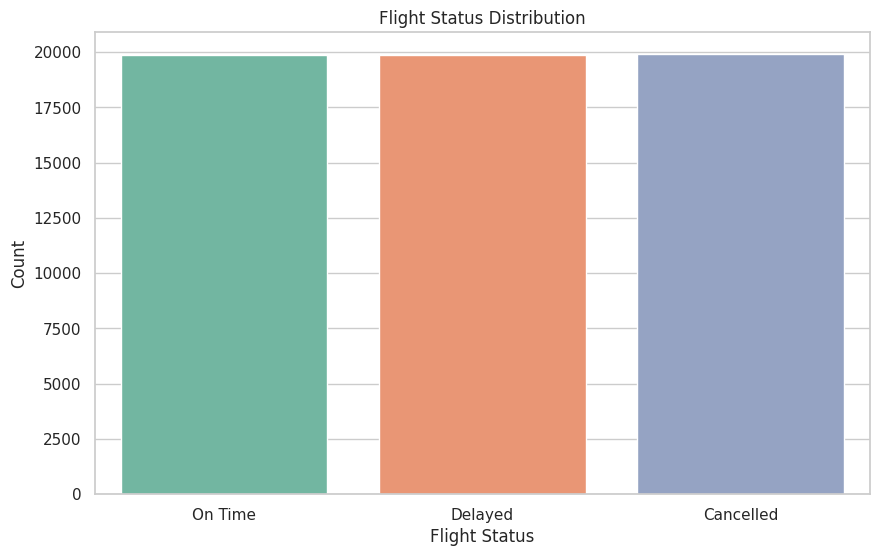

<ipython-input-128-440259929b23>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis')


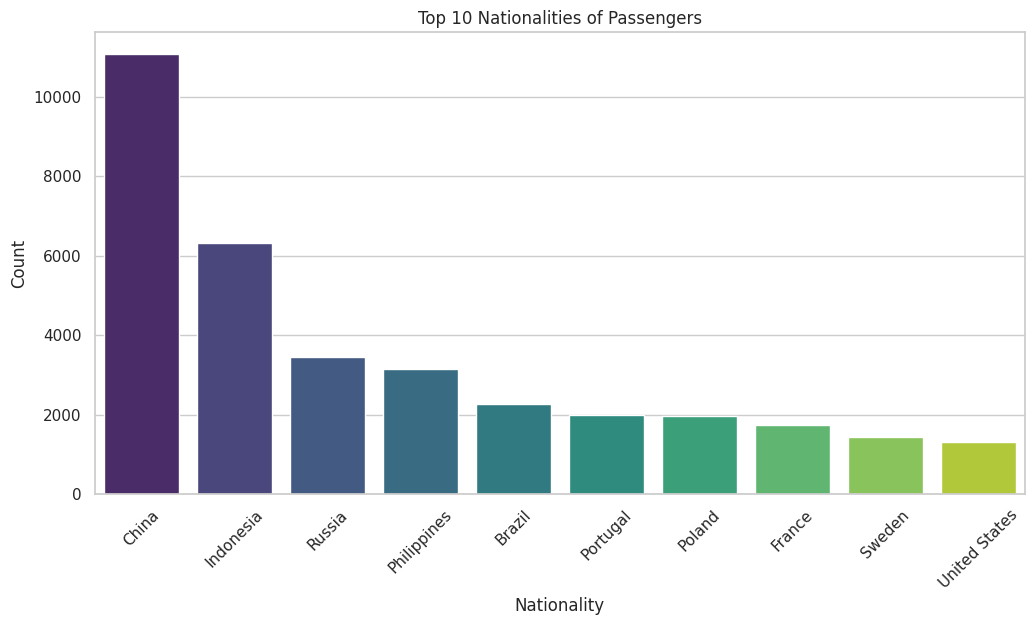

In [128]:
# 1️⃣ Age Distribution
plt.figure()
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2️⃣ Gender Distribution
plt.figure()
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3️⃣ Flight Status Count
plt.figure()
sns.countplot(data=df, x='Flight Status', palette='Set2')
plt.title('Flight Status Distribution')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.show()

# 4️⃣ Top 10 Nationalities
plt.figure(figsize=(12, 6))
top_nationalities = df['Nationality'].value_counts().head(10)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis')
plt.title('Top 10 Nationalities of Passengers')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-129-2e33b4cb18e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Flight Status', y='Age', palette='coolwarm')


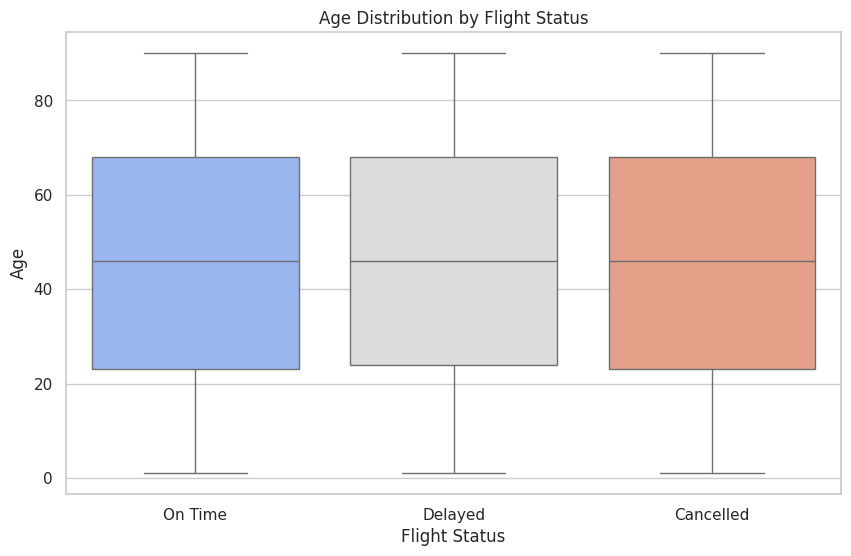

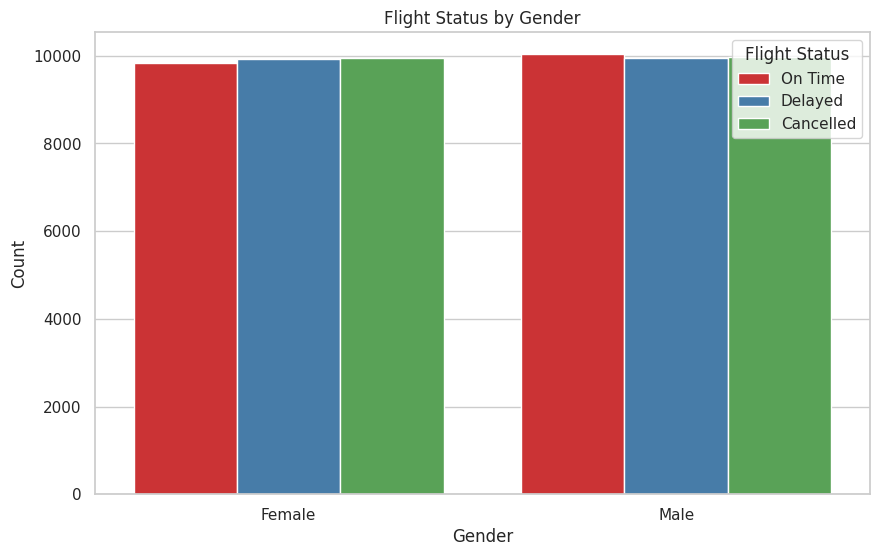

In [129]:
# 5️⃣ Age vs Flight Status
plt.figure()
sns.boxplot(data=df, x='Flight Status', y='Age', palette='coolwarm')
plt.title('Age Distribution by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Age')
plt.show()

# 6️⃣ Gender vs Flight Status
plt.figure()
sns.countplot(data=df, x='Gender', hue='Flight Status', palette='Set1')
plt.title('Flight Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


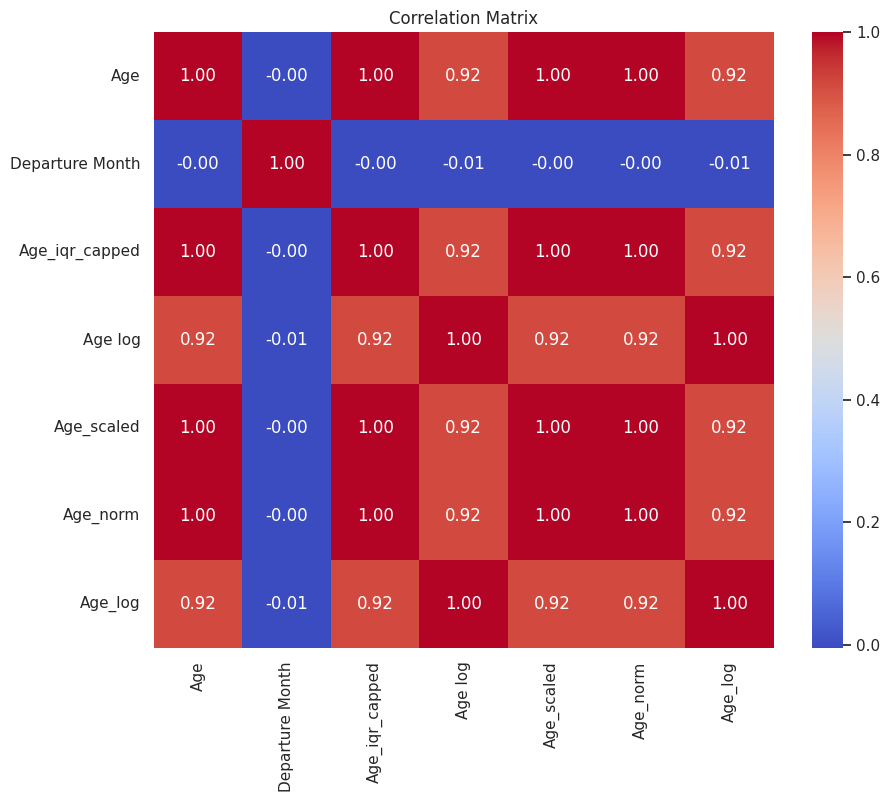

In [130]:
# 7️⃣ Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


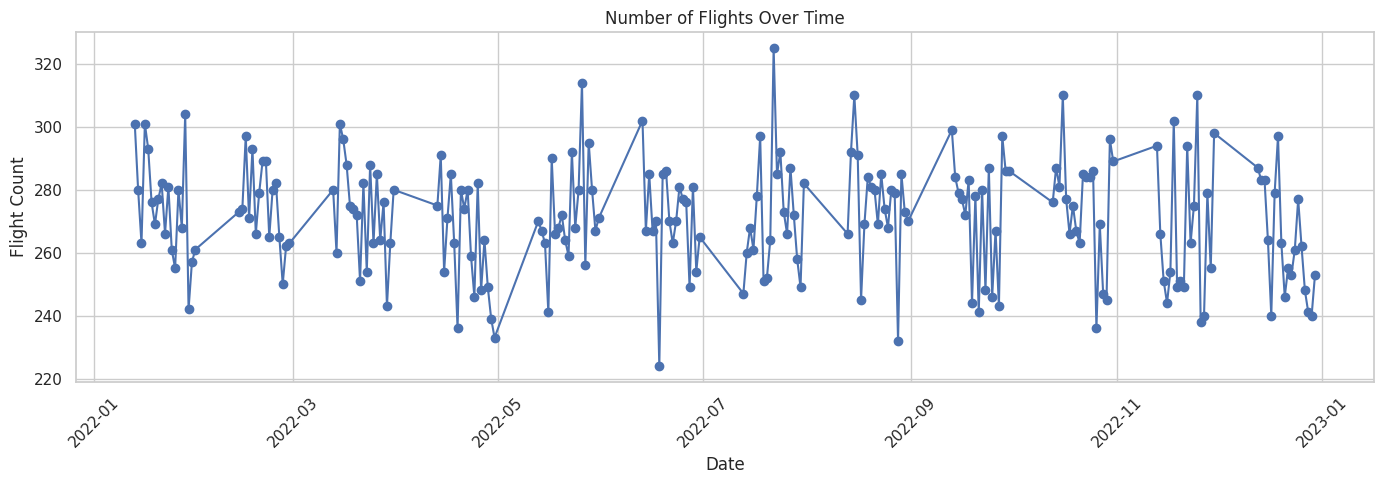

In [133]:
# 8️⃣ Departure Date Trend (Optional)
if 'Departure Date' in df.columns:
    df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
    flights_over_time = df['Departure Date'].dt.date.value_counts().sort_index()

    plt.figure(figsize=(14, 5))
    flights_over_time.plot(kind='line', marker='o')
    plt.title('Number of Flights Over Time')
    plt.xlabel('Date')
    plt.ylabel('Flight Count')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
